## Learning Curves ( Ensemble - Deepnet )

#### *Split du train_set de n% , calcul de l'AUC*

In [7]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from bigml.api import BigML


api = BigML(project="project/5d94a3525a213962e20002f5") # AUTH dans docker/auth.env
df = pd.read_csv('files_csv_perf/GiveMeCredit-Trainset.csv', index_col=0)

def data_auc(n):
#     api = BigML(project="project/5d94a3525a213962e20002f5") # AUTH dans docker/auth.env
#     df = pd.read_csv('files_csv_perf/GiveMeCredit-Trainset.csv', index_col=0)
    
    # split de n% du train_set
    train_split = df.head(int(len(df)*(n/100)))

    ### Enregistrement csv 
    path = f"files_csv_perf/train_split_{n}.csv"
    batch_path_ens  = f"files_csv_perf/GiveMeCredit_Review_Ensemble_Train{n}.csv"
    batch_path_deep  = f"files_csv_perf/GiveMeCredit_Review_Deepnet_Train{n}.csv"
    
    train_split.to_csv(path)

    # Creation d'une source
    source = api.create_source(path)
    api.ok(source)
    # Creation d'un dataset ( = source )
    dataset_train = api.create_dataset(source)
    api.ok(dataset_train)

    # Récuperation des 20% validation set 

    test_dataset = api.get_dataset('dataset/5db9ab475299631de9001020')

    # Création d'un modele ensemble avec les n% 
    ensemble = api.create_ensemble(dataset_train , {"objective_field" : "SeriousDlqin2yrs"})
    print(f"Création model {n} % du train_set - Ensemble")
    
    # Création d'un modele deepnet avec les n%
    
    deepnet = api.create_deepnet(dataset_train , {"objective_field" : "SeriousDlqin2yrs"})
    print(f"Création model {n} % du train_set - Deepnet")
    
    
    # Récupération des batchs prédiction Ensemble - Deepnet 

    batch_prediction_ens = api.create_batch_prediction(ensemble, test_dataset,{"header": True, "all_fields": True, "probabilities": True})
    api.ok(batch_prediction_ens)
    api.download_batch_prediction(batch_prediction_ens,filename=batch_path_ens)
    
    batch_prediction_deep = api.create_batch_prediction(deepnet, test_dataset,{"header": True, "all_fields": True, "probabilities": True})
    api.ok(batch_prediction_deep)
    api.download_batch_prediction(batch_prediction_deep,filename=batch_path_deep)

    #### AUC 

    df_ens = pd.read_csv(batch_path_ens, index_col=0)
    df_deep = pd.read_csv(batch_path_deep, index_col=0)

    actual_ens = df_ens['SeriousDlqin2yrs']
    scores_ens = df_ens['1 probability']
    auc_ens = roc_auc_score(actual_ens, scores_ens)
    
    actual_deep = df_deep['SeriousDlqin2yrs']
    scores_deep = df_deep['1 probability']
    auc_deep = roc_auc_score(actual_deep, scores_deep)
    
    
    return auc_ens , auc_deep


Création model 10 % du train_set - Ensemble
Création model 10 % du train_set - Deepnet
Création model 20 % du train_set - Ensemble
Création model 20 % du train_set - Deepnet
Création model 30 % du train_set - Ensemble
Création model 30 % du train_set - Deepnet
Création model 40 % du train_set - Ensemble
Création model 40 % du train_set - Deepnet
Création model 50 % du train_set - Ensemble
Création model 50 % du train_set - Deepnet
Création model 60 % du train_set - Ensemble
Création model 60 % du train_set - Deepnet
Création model 70 % du train_set - Ensemble
Création model 70 % du train_set - Deepnet
Création model 80 % du train_set - Ensemble
Création model 80 % du train_set - Deepnet
Création model 90 % du train_set - Ensemble
Création model 90 % du train_set - Deepnet
Création model 100 % du train_set - Ensemble
Création model 100 % du train_set - Deepnet


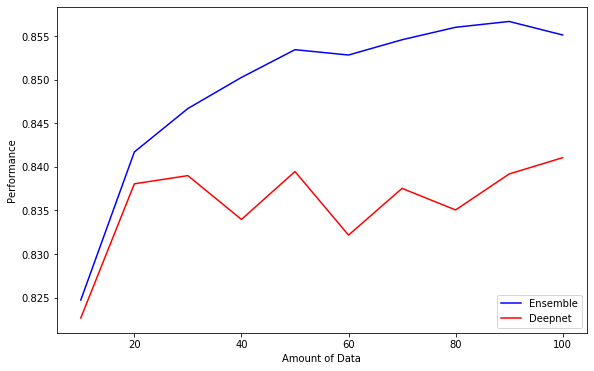

In [8]:
import matplotlib.pyplot as plt
import pickle

n = 10
auc_list_ens = []
auc_list_deep = []
data_amount_list = []
while n <= 100:
    auc_ens , auc_deep = data_auc(n)
    auc_list_ens.append(auc_ens)
    auc_list_deep.append(auc_deep)
    data_amount_list.append(n)
    n += 10
    
plt.rcParams['figure.figsize'] = [9.5 , 6]
plt.xlabel("Amount of Data")
plt.ylabel("Performance")
plt.plot(data_amount_list,auc_list_ens, color="blue", label='Ensemble')
plt.plot(data_amount_list,auc_list_deep, color="red", label='Deepnet')
plt.legend(loc="lower right")
plt.savefig('graphs/learningcurves_ensemble_deepnet_val.png')
plt.show()



pickle_out_ens = open("auc/auc_ens_val","wb")
pickle_out_deep = open("auc/auc_deep_val","wb")
pickle.dump(auc_list_ens, pickle_out_ens)
pickle.dump(auc_list_deep, pickle_out_deep)
pickle_out_ens.close()
pickle_out_deep.close()






In [9]:
auc_list_ens

[0.8247148618699047,
 0.8416955556215644,
 0.8466814684045113,
 0.8502452173288508,
 0.8534284451392118,
 0.8528152045295445,
 0.854567862702059,
 0.8559965969007679,
 0.8566640672001264,
 0.8551143004205994]

In [10]:
auc_list_deep

[0.8226590902340009,
 0.838046684882144,
 0.8389841332050003,
 0.8339586919791754,
 0.8394533583437778,
 0.8321617083948288,
 0.8375219000253149,
 0.8350480738750952,
 0.8391751784787225,
 0.8410432387786615]